# Composition of 3K Wolfrom Planetary Gear Set

In [1728]:
# Composition of 3K Mechanical Paradox Gear Set

# Inputs for Calculations
# Ratio 8.90909 for EAMR
TYPE = 2; # 0=Simple, 1=Wolfrom, 2=Wolfrom Modified
alpha = 20.0; # Pressure Angle [deg]
m = 0.5 # Common Module
Np = 20;  # Planets Number (it must be even number)
Zr2_MultipleNp = 14;
Zs1_MultipleNp = 11;

# Inputs for Plots
MarkerSize=5;
ColorCross="#c4c7cb"
ColorSun1="#2471a3"
ColorPlanet1="#7fb3d5"
ColorRing1="#a9cce3"
ColorSun2="#edbb99"
ColorPlanet2="#6e2c00" # (No need for Compound)
ColorRing2="#d35400" # (No need for Compound)
PlotSize=800;
PlotTicks=10;
TextPos=1.1;
TextSize=7;

In [1729]:
# Calc
m1 = m; # Module1
m2 = m; # Module2 (No need for Simple Type)

if TYPE==2 TYPE_DIFF=0.5
else TYPE_DIFF=1.0
end
Zr1_MultipleNp = Zr2_MultipleNp+TYPE_DIFF;

Zs1 = Zs1_MultipleNp*Np; # Teeth Number of Sun
Zr1 = Zr1_MultipleNp*Np; # Teeth Number of Ring1
Zp1 = (Zr1-Zs1)/2; # Teeth Number of Planet1

Ds1 = Zs1*m1; # Dia of Sun1
Dp1 = Zp1*m1; # Dia of Planet1
Dr1 = Zr1*m1; # Dia of Ring1
Dc = Ds1+Dp1; # Dia of Carrier
Gp1s = Dp1/Ds1; # Ratio of Planet1-Sun

if TYPE==1 || TYPE==2
    Zr2 = Zr2_MultipleNp*Np; # Teeth Number of Ring2
    Zp2 = ((Zr2*m2)-Dc)/(m2); # Teeth Number of Planet2 (No need for Simple Type)
    Dp2 = Zp2*m2; # Dia of Planet2
    Ds2 = Dc-Dp2; # Dia of Sun2
    Zs2 = Ds2/m2; # Teeth Number of Sun2
    Dr2 = Zr2*m2; # Dia of Ring2
    Gr2p2 = Dr2/Dp2; # Ratio of Ring-Planet2    
    G1 = round(1+Gr2p2*Gp1s,sigdigits=6); # Ratio Total (Ring2 Fiexed, Carrier Output)
    G2 = -round(Gr2p2*Gp1s,sigdigits=6); # Ratio Total (Carrier Fixed, Ring2 Output)
    L1 = Dr1/Ds1;
    L2 = (Dr1*Dp2)/(Dr2*Dp1);
    G22 = round((1+L1)/(1-L2),sigdigits=6); # Ratio Total (Type-3K : Carrier Free, Ring Output)
    if L2>1
        G22 = -G22;
    end
else
    G3 = round(1+Zr1/Zs1,sigdigits=6); # Ratio Total (Carrier Output)
    G4 = -round(Zr1/Zs1,sigdigits=6); # Ratio Total (Ring1 Output)
end

# Output
if TYPE==1 || TYPE==2
    print("##### Wolfrom Planetary Gear Set\n\n")
    print("### Ratio\n")
    print("Ratio (Sun-Planet1) = ",Gp1s,"\n")
    print("Ratio (Planet2-Ring2) = ",Gr2p2,"\n")
    print("Ratio Total (Ring2 Fiexed, Carrier Output) = ",G1,"\n")
    print("Ratio Total (Carrier Fixed, Ring2 Output) = ",G2,"\n")
    print("Ratio Total (Type-3K : Carrier Free, Ring2 Output) = ",G22,"\n\n")
    print("### Size\n")
    print("Sun = ",Ds1," [mm],  ",Zs1," [ea]\n")
    print("Planet1 = ",Dp1," [mm],  ",Zp1," [ea]\n")
    print("Ring1 = ",Dr1," [mm],  ",Zr1," [ea]\n")
    print("Planet2 = ",Dp2," [mm],  ",Zp2," [ea]\n")
    print("Ring2 = ",Dr2," [mm],  ",Zr2," [ea]\n")
else
    print("##### Simple Planetary Gear Set\n\n")
    print("### Ratio\n")
    print("Ratio (Sun-Planet1) = ",Gp1s,"\n")
    print("Ratio (Total, Carrier Output) = ",G3," (1-stage),  ",G3^2," (2-stages),  ",G3^3," (3-stages)\n")
    print("Ratio (Total, Ring1 Output) = ",G4," (1-stage),  ",G4^2," (2-stages),  ",G4^3," (3-stages)\n\n")
    print("### Size\n")
    print("Sun = ",Ds1," [mm],  ",Zs1," [ea]\n")
    print("Planet1 = ",Dp1," [mm],  ",Zp1," [ea]\n")
    print("Ring1 = ",Dr1," [mm],  ",Zr1," [ea]\n")
end

##### Wolfrom Planetary Gear Set

### Ratio
Ratio (Sun-Planet1) = 0.1590909090909091
Ratio (Planet2-Ring2) = 11.2
Ratio Total (Ring2 Fiexed, Carrier Output) = 2.78182
Ratio Total (Carrier Fixed, Ring2 Output) = -1.78182
Ratio Total (Type-3K : Carrier Free, Ring2 Output) = 8.90909

### Size
Sun = 110.0 [mm],  220 [ea]
Planet1 = 17.5 [mm],  35.0 [ea]
Ring1 = 145.0 [mm],  290.0 [ea]
Planet2 = 12.5 [mm],  25.0 [ea]
Ring2 = 140.0 [mm],  280 [ea]


In [1730]:
# Checks
print("### Checks\n")

### 각각의 유성기어와 썬기어의 맞물림 순간의 치접촉 형태가 각각 다른지 확인
### 진동이 더 적게 발생하도록 하는 조건 (선택사항)
## Sequential Mesh Condition (Non-Factorizing) 1
print("# Sequential Mesh Condition (Non-Factorizing, Not Required) 1 : ")
if (Zs1%Np)!=0 && (Zr1%Np)!=0 print("Good for noise\n") else print("No good for noise\n") end

## Sequential Mesh Condition (Non-Factorizing) 2
if TYPE==1 || TYPE==2
    print("# Sequential Mesh Condition (Non-Factorizing, Not Required) 2 : ")
    if (Zs2%Np)!=0 && (Zr2%Np)!=0 print("Good for noise\n") else print("No good for noise\n") end
end

### 등간격 배치조건
### 유성기어가 일정한 간격을 두고 배치되어야 함
## Check Planets Numbers (Equal Distance Condition) 1
print("# Planet Numbers (Equal Distance Condition) 1 : ")
if (Zs1+Zr1)%(Np*TYPE_DIFF)==0 print("OK\n") else print("Fail\n") end

## Check Planets Numbers (Equal Distance Condition) 2
print("# Planet Numbers (Equal Distance Condition) 2 : ")
if TYPE==1 || TYPE==2
    if Zr2%Np==0 print("OK\n") else print("Fail\n") end
end

### 중첩 방지 조건
### 유성기어 사이에 중첩이 없어야 함
## Check Planets Interference (Non-Overlap Condition) 1
print("# Planets Interference (Non-Overlap Condition) 1 : ")
if alpha==20 && Np<(pi/asin((Zp1+2)/(Zp1+Zs1))) print("OK\n") else print("Fail\n") end

## Check Planets Interference (Non-Overlap Condition) 2
if TYPE==1 || TYPE==2
    print("# Planets Interference (Non-Overlap Condition) 2 : ")
    if alpha==20 && Np<(pi/asin((Zp2+2)/(Zp2+Zs2))) print("OK\n") else print("Fail\n") end
end
if alpha!=20 print("No Check (Non-Standard) \n") end

### 인볼류트 간섭조건
### 유성기어의 잇수가 작을 때, 유성기어의 이뿌리가 링기어의 이끝과 간섭을 일으킬 수 있음
## Check Involute Interference Condition 1
print("# Involute Interference Condition 1 : ")
temp=(Zp1*sin(deg2rad(alpha)))^2;
temp2 = (temp-4)/(2*temp-4);
if alpha==20 && Zr1>=temp2 print("OK\n") else print("Fail\n") end

## Check Involute Interference Condition 2
if TYPE==1 || TYPE==2
    print("# Involute Interference Condition 2 : ")
    temp=(Zp2*sin(deg2rad(alpha)))^2;
    temp2 = (temp-4)/(2*temp-4);
    if alpha==20 && Zr2>=temp2 print("OK\n") else print("Fail\n") end
end
if alpha!=20 print("No Check (Non-Standard) \n") end

### 트리밍 간섭조건
### 링기어에 유성기어를 조립할 때, 중심에서 외곽으로 끼워넣는 경우 간섭 발생 여부
### 트리밍 간섭을 피하기 위해서는 +방향 전위를 주면 유리함
## Check Trimming Interference 1
print("# Trimming Interference 1 : ")
if alpha==20 && (Zr1-Zp1)>=16 print("OK\n") else print("Fail\n") end

## Check Trimming Interference 2
if TYPE==1 || TYPE==2
    print("# Trimming Interference 2 : ")
    if alpha==20 && (Zr2-Zp2)>=16 print("OK\n") else print("Fail\n") end
end
if alpha!=20 print("No Check (Non-Standard) \n") end

### Checks
# Sequential Mesh Condition (Non-Factorizing, Not Required) 1 : No good for noise
# Sequential Mesh Condition (Non-Factorizing, Not Required) 2 : No good for noise
# Planet Numbers (Equal Distance Condition) 1 : OK
# Planet Numbers (Equal Distance Condition) 2 : OK
# Planets Interference (Non-Overlap Condition) 1 : OK
# Planets Interference (Non-Overlap Condition) 2 : OK
# Involute Interference Condition 1 : OK
# Involute Interference Condition 2 : OK
# Trimming Interference 1 : OK
# Trimming Interference 2 : OK


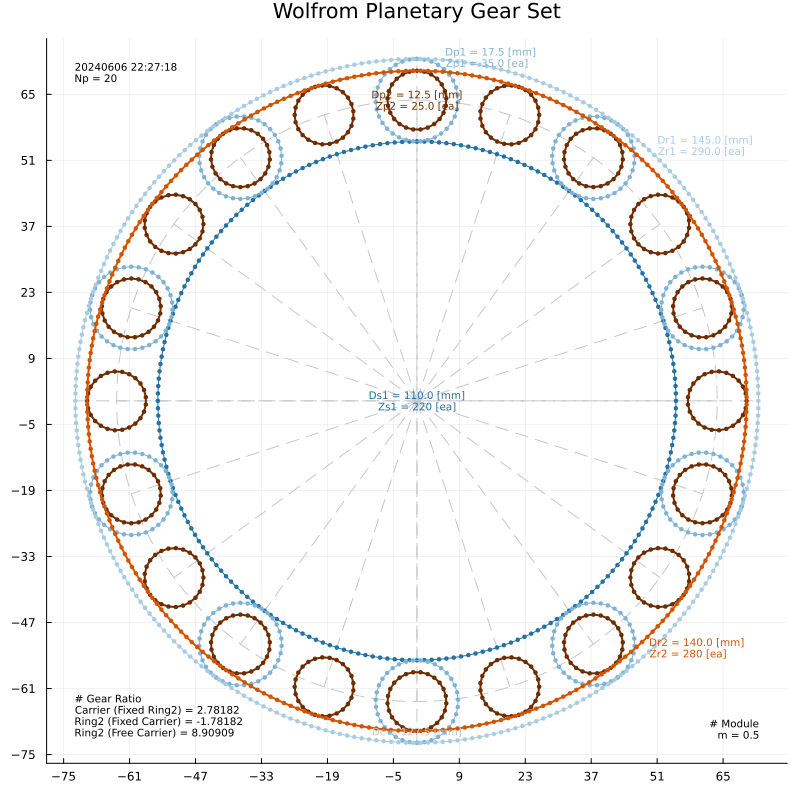

"/mnt/sda/home/osboxes/JUPYTER/20240605_Paradox_Test/WOLFROM.png"

In [1731]:
using Plots
using Dates

# Plots
if TYPE==1 || TYPE==2
    TITLE="Wolfrom Planetary Gear Set" else TITLE="Simple Planetary Gear Set" 
end
p=plot(aspect_ratio=:equal,legend=false,size=(PlotSize,PlotSize),
    xticks=[-2*Dp1-Ds1:round((2*Dp1+Ds1)/PlotTicks):2*Dp1+Ds1;],yticks=[-2*Dp1-Ds1:round((2*Dp1+Ds1)/PlotTicks):2*Dp1+Ds1;],
    title=TITLE)

# Now
NOW=now();
NOW=Dates.format(NOW,"yyyymmdd HH:MM:SS")
annotate!(-Dr1/2,Dr1/2,Plots.text("$NOW\nNp = $Np",:black,:left,:top,TextSize))

# Gear Ratio
if TYPE==1 || TYPE==2
    annotate!(-Dr1/2,-Dr1/2,
        Plots.text("# Gear Ratio\nCarrier (Fixed Ring2) = $G1\nRing2 (Fixed Carrier) = $G2\nRing2 (Free Carrier) = $G22",
        :black,:left,:bottom,TextSize))
else
    annotate!(-Dr1/2,-Dr1/2,Plots.text("# Gear Ratio\nCarrier = $G3\nRing1 = $G4",:black,:left,:bottom,TextSize))
end

# Module
annotate!(Dr1/2,-Dr1/2,Plots.text("# Module\nm = $m",:black,:right,:bottom,TextSize))

# Center Cross
plot!([0, 0],[-Dr1/2, Dr1/2],color=ColorCross,linestyle=:dash)
plot!([-Dr1/2, Dr1/2],[0, 0],color=ColorCross,linestyle=:dash)

# Carrier
tc=[0:0.01:2*pi;]
Xc=(Dc/2)*sin.(tc)
Yc=(Dc/2)*cos.(tc)
plot!(p,Xc,Yc,color=ColorCross,linestyle=:dash)

# Centers on Carrier
Xcc=[0]
Ycc=[Dc/2]
for i in [1:Np;]
    Xcc = [Xcc Xcc[1]*cos(2*pi*(i/Np)).-Ycc[1]*sin(2*pi*(i/Np))]
    Ycc = [Ycc Xcc[1]*sin(2*pi*(i/Np)).+Ycc[1]*cos(2*pi*(i/Np))]
    plot!(p,[0,Xcc[i+1]],[0,Ycc[i+1]],color=ColorCross,linestyle=:dash)
end
annotate!(0,TextPos*(-Dc/2),Plots.text("Dc = $Dc [mm]",ColorCross,:center,TextSize))

# Sun
ts1=[0:2*pi/Zs1:2*pi;]
Xs1=(Ds1/2)*sin.(ts1)
Ys1=(Ds1/2)*cos.(ts1)
Xs1b=Xs1
Ys1b=Ys1
if !isodd(Zp1)
    Xs1b = Xs1*cos(2*pi/(Zs1*2)).-Ys1*sin(2*pi/(Zs1*2))
    Ys1b = Xs1*sin(2*pi/(Zs1*2)).+Ys1*cos(2*pi/(Zs1*2))
end
plot!(p,Xs1b,Ys1b,color=ColorSun1)
scatter!(p,Xs1b,Ys1b,markercolor=ColorSun1,markersize=MarkerSize*m1,markerstrokewidth=0)
annotate!(0,0,Plots.text("Ds1 = $Ds1 [mm]\nZs1 = $Zs1 [ea]",ColorSun1,:center,TextSize))

# Planet1
tp1=[0:2*pi/Zp1:2*pi;]
Xp1=(Dp1/2)*sin.(tp1)
Yp1=(Dp1/2)*cos.(tp1).+(Dc/2);
for i in [1:Np;]
    Xp1 = [Xp1 Xp1[:,1]*cos(2*pi*(i/Np)).-Yp1[:,1]*sin(2*pi*(i/Np))]
    Yp1 = [Yp1 Xp1[:,1]*sin(2*pi*(i/Np)).+Yp1[:,1]*cos(2*pi*(i/Np))]
    if TYPE==2 && isodd(i)
        plot!(p,Xp1[:,i],Yp1[:,i],color=ColorPlanet1)
        scatter!(p,Xp1[:,i],Yp1[:,i],markercolor=ColorPlanet1,markersize=MarkerSize*m1,markerstrokewidth=0)
    elseif TYPE==0 || TYPE==1
        plot!(p,Xp1[:,i],Yp1[:,i],color=ColorPlanet1)
        scatter!(p,Xp1[:,i],Yp1[:,i],markercolor=ColorPlanet1,markersize=MarkerSize*m1,markerstrokewidth=0)
    end
end
annotate!(((Dp1/2)*cos(pi/4)),Dc/2+(Dp1/2)*sin(pi/4),
    Plots.text("Dp1 = $Dp1 [mm]\nZp1 = $Zp1 [ea]",ColorPlanet1,:left,:bottom,TextSize))

# Ring1
tr1=[0:2*pi/Zr1:2*pi;]
Xr1=(Dr1/2)*sin.(tr1)
Yr1=(Dr1/2)*cos.(tr1)
Xr12=Xr1
Yr12=Yr1
Xr12 = Xr1*cos(2*pi/(Zr1*2)).-Yr1*sin(2*pi/(Zr1*2))
Yr12 = Xr1*sin(2*pi/(Zr1*2)).+Yr1*cos(2*pi/(Zr1*2))
plot!(p,Xr12,Yr12,color=ColorRing1)
scatter!(p,Xr12,Yr12,markercolor=ColorRing1,markersize=MarkerSize*m1,markerstrokewidth=0)
annotate!((Dr1/2)*cos(pi/4),(Dr1/2)*sin(pi/4),
    Plots.text("Dr1 = $Dr1 [mm]\nZr1 = $Zr1 [ea]",ColorRing1,:left,:bottom,TextSize))

# Planet2
if TYPE==1 || TYPE==2
    tp2=[0:2*pi/Zp2:2*pi;]
    Xp2=(Dp2/2)*sin.(tp2)
    Yp2=(Dp2/2)*cos.(tp2).+(Dc/2)
    for i in [1:Np;]
        Xp2 = [Xp2 Xp2[:,1]*cos(2*pi*(i/Np)).-Yp2[:,1]*sin(2*pi*(i/Np))]
        Yp2 = [Yp2 Xp2[:,1]*sin(2*pi*(i/Np)).+Yp2[:,1]*cos(2*pi*(i/Np))]
        plot!(p,Xp2[:,i],Yp2[:,i],color=ColorPlanet2,linewidth=2)
        scatter!(p,Xp2[:,i],Yp2[:,i],markercolor=ColorPlanet2,markersize=MarkerSize*m2,markerstrokewidth=0)
    end
    annotate!(0,Dc/2,Plots.text("Dp2 = $Dp2 [mm]\nZp2 = $Zp2 [ea]",ColorPlanet2,:center,:center,TextSize))
end

# Ring2
if TYPE==1 || TYPE==2
    tr2=[0:2*pi/Zr2:2*pi;]
    Xr2=(Dr2/2)*sin.(tr2)
    Yr2=(Dr2/2)*cos.(tr2)
    Xr22=Xr2
    Yr22=Yr2
    Xr22 = Xr2*cos(2*pi/(Zr2*2)).-Yr2*sin(2*pi/(Zr2*2))
    Yr22 = Xr2*sin(2*pi/(Zr2*2)).+Yr2*cos(2*pi/(Zr2*2))
    plot!(p,Xr22,Yr22,color=ColorRing2,linewidth=2)
    scatter!(p,Xr22,Yr22,markercolor=ColorRing2,markersize=MarkerSize*m2,markerstrokewidth=0)
    annotate!((Dr2/2)*cos(pi/4),(-Dr2/2)*sin(pi/4),Plots.text("Dr2 = $Dr2 [mm]\nZr2 = $Zr2 [ea]",ColorRing2,:left,:top,TextSize))
end

# Show
display(p)
savefig(p,"./WOLFROM.png")

In [1732]:
# Inputs for Calculations
# Ratio 96
TYPE = 1; # 0=Simple, 1=Wolfrom, 2=Wolfrom Modified
alpha = 20.0; # Pressure Angle [deg]
m = 1.0 # Common Module
Np = 4;  # Planets Number (it must be even number)
Zr2_MultipleNp = 24;
Zs1_MultipleNp = 5;

In [1733]:
# Inputs for Calculations
# Ratio 8.90909 for EAMR
TYPE = 2; # 0=Simple, 1=Wolfrom, 2=Wolfrom Modified
alpha = 20.0; # Pressure Angle [deg]
m = 0.5 # Common Module
Np = 20;  # Planets Number (it must be even number)
Zr2_MultipleNp = 14;
Zs1_MultipleNp = 11;

In [1734]:
# Inputs for Calculations
# Ratio 45 for MOBED
TYPE = 1; # 0=Simple, 1=Wolfrom, 2=Wolfrom Modified
alpha = 20.0; # Pressure Angle [deg]
m = 0.5 # Common Module
Np = 4;  # Planets Number (it must be even number)
Zr2_MultipleNp = 15;
Zs1_MultipleNp = 4;

In [1735]:
# Inputs for Calculations
# Ratio 25 for MOBED
TYPE = 1; # 0=Simple, 1=Wolfrom, 2=Wolfrom Modified
alpha = 20.0; # Pressure Angle [deg]
m = 0.5 # Common Module
Np = 4;  # Planets Number (it must be even number)
Zr2_MultipleNp = 15;
Zs1_MultipleNp = 6;

In [1736]:
# Inputs for Calculations
# Ratio 45 for MOBED
TYPE = 1; # 0=Simple, 1=Wolfrom, 2=Wolfrom Modified
alpha = 20.0; # Pressure Angle [deg]
m = 0.6 # Common Module
Np = 4;  # Planets Number (it must be even number)
Zr2_MultipleNp = 15;
Zs1_MultipleNp = 4;

In [1737]:
# Inputs for Calculations
# Ratio 25 for MOBED
TYPE = 1; # 0=Simple, 1=Wolfrom, 2=Wolfrom Modified
alpha = 20.0; # Pressure Angle [deg]
m = 0.6 # Common Module
Np = 4;  # Planets Number (it must be even number)
Zr2_MultipleNp = 15;
Zs1_MultipleNp = 6;